In [10]:
import pandas as pd
# Load the dataset
df = pd.read_csv('breast_cancer_dataset.csv')

# Display the first 10 rows
print("First 10 Rows of the Dataset:")
print(df.head(10))

# Display column information
print("\nColumn Information:")
df.info()

First 10 Rows of the Dataset:
        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   862965         B       12.180         20.52           77.22      458.7   
1   908489         M       13.980         19.62           91.12      599.5   
2  8910721         B       14.290         16.82           90.30      632.6   
3   863031         B       11.640         18.33           75.17      412.5   
4   859711         B        8.888         14.64           58.79      244.0   
5  8510653         B       13.080         15.71           85.63      520.0   
6    86517         M       18.660         17.12          121.40     1077.0   
7  9113455         B       13.140         20.74           85.98      536.9   
8  8810955         M       14.190         23.81           92.87      610.7   
9   896839         M       16.030         15.51          105.80      793.2   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08013           0.040

In [11]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:

# Check for zero values
print("\nZero Values in Each Column:")
zero_values = (df == 0).sum()
print(zero_values)

# Replace zero values with the column mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if zero_values[col] > 0:  # Only process columns with zero values
        df[col] = df[col].replace(0, df[col].mean())

# Confirm zero values replaced
print("\nZero Values After Replacement:")
print((df == 0).sum())



Zero Values in Each Column:
id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             41
concave points_mean        41
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               41
concave points_se          41
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            41
concave points_worst       41
symmetry_worst              0
fractal_dimension_worst     0
dtype: int6

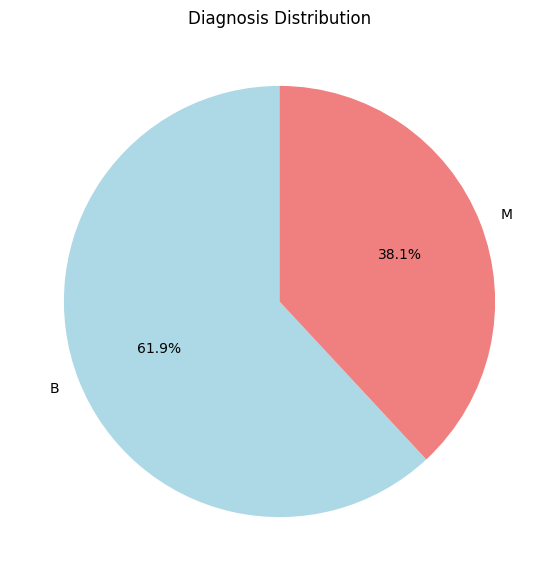


Updated Diagnosis Column:
0    0
1    1
2    0
3    0
4    0
Name: diagnosis, dtype: int64


In [13]:
import matplotlib.pyplot as plt
# Distribution 
# Get the counts of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7))
diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Diagnosis Distribution')
plt.ylabel('')  # Hide the y-axis label
plt.show()

# Map 'M' to 1 and 'B' to 0 in the diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check the changes
print("\nUpdated Diagnosis Column:")
print(df['diagnosis'].head())


In [14]:
from scipy.stats import zscore
# Outlier Detection - Z-Score Method
# Compute the Z-scores for all numerical columns
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Convert the Z-scores to a DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Count outliers (Z-score > 3 or < -3) for each column
outliers_zscore_count = (z_scores_df.abs() > 3).sum()

# Replace outliers with column mean for Z-score method using .loc to avoid warning
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df.loc[z_scores_df[col].abs() > 3, col] = df[col].mean()  # Use .loc to modify values

# Display the count of outliers for each column detected using Z-Score
print("\nOutliers count for each column (Z-Score method):")
print(outliers_zscore_count)

# Outlier Detection - IQR Method
# Compute the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers (values outside the IQR bounds) for each column
outliers_iqr_count = ((df < lower_bound) | (df > upper_bound)).sum()

# Replace outliers with column mean for IQR method using .loc to avoid warning
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = df[col].mean()  # Use .loc to modify values

# Display the count of outliers for each column detected using IQR
print("\nOutliers count for each column (IQR method):")
print(outliers_iqr_count)


Outliers count for each column (Z-Score method):
id                         32
diagnosis                   0
radius_mean                16
texture_mean               15
perimeter_mean             17
area_mean                  29
smoothness_mean            11
compactness_mean           25
concavity_mean             22
concave points_mean        15
symmetry_mean              14
fractal_dimension_mean     22
radius_se                  22
texture_se                 31
perimeter_se               25
area_se                    20
smoothness_se              43
compactness_se             42
concavity_se               22
concave points_se          31
symmetry_se                35
fractal_dimension_se       29
radius_worst               24
texture_worst               9
perimeter_worst            19
area_worst                 29
smoothness_worst            9
compactness_worst          35
concavity_worst            16
concave points_worst        0
symmetry_worst             31
fractal_dimension_wo

C:\Users\User\AppData\Local\Temp\ipykernel_13772\4233119259.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27769440.358549222' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores_df[col].abs() > 3, col] = df[col].mean()  # Use .loc to modify values
C:\Users\User\AppData\Local\Temp\ipykernel_13772\4233119259.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.38082901554404147' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores_df[col].abs() > 3, col] = df[col].mean()  # Use .loc to modify values


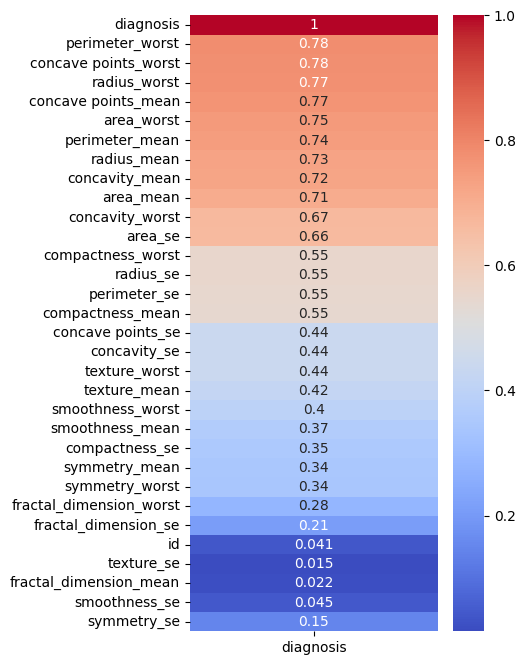

In [15]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()["diagnosis"].sort_values(ascending=False).abs().to_frame(), annot=True, cmap='coolwarm')
plt.show()


In [16]:

# Set a threshold for correlation (e.g., 0.2)
correlation_threshold = 0.2

# Get the columns that are highly correlated with the target (diagnosis)
highly_correlated_columns = correlation_matrix["diagnosis"][correlation_matrix["diagnosis"].abs() > correlation_threshold].index

# Keep only the relevant columns (including 'diagnosis')
df_filtered = df[highly_correlated_columns]

# Determine the dropped columns by comparing original columns with the filtered ones
dropped_columns = set(df.columns) - set(df_filtered.columns)

# Display the remaining columns and the dropped columns
print("\nRemaining Columns After Dropping Unrelated Columns:")
print(df_filtered.columns)

print("\nDropped Columns:")
print(dropped_columns)



Remaining Columns After Dropping Unrelated Columns:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dropped Columns:
{'id', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se'}


In [17]:
# Display the final processed dataframe
print("\nProcessed DataFrame After All Steps:")
print(df_filtered.head())  # Show the first few rows of the processed dataframe



Processed DataFrame After All Steps:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        0.0       12.180         20.52           77.22      458.7   
1        1.0       13.980         19.62           91.12      599.5   
2        0.0       14.290         16.82           90.30      632.6   
3        0.0       11.640         18.33           75.17      412.5   
4        0.0        8.888         14.64           58.79      244.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08013           0.04038         0.02383              0.01770   
1          0.10600           0.11330         0.11260              0.06463   
2          0.06429           0.02675         0.00725              0.00625   
3          0.11420           0.10170         0.07070              0.03485   
4          0.09783           0.15310         0.08606              0.02872   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0      

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report 

# Step 1: Splitting the data into features and target variable
X = df_filtered.drop('diagnosis', axis=1)  # Features
y = df_filtered['diagnosis']  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicting with Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)

# Step 5: Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)  
svm.fit(X_train_scaled, y_train)

# Predicting with SVM
y_pred_svm = svm.predict(X_test_scaled)

# Step 6: Model Evaluation

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# SVM Evaluation
print("\nSupport Vector Machine Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Logistic Regression Evaluation:
Accuracy: 0.9689119170984456
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       232
         1.0       0.99      0.93      0.96       154

    accuracy                           0.97       386
   macro avg       0.97      0.96      0.97       386
weighted avg       0.97      0.97      0.97       386


Support Vector Machine Evaluation:
Accuracy: 0.9922279792746114
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       232
         1.0       0.99      0.99      0.99       154

    accuracy                           0.99       386
   macro avg       0.99      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386



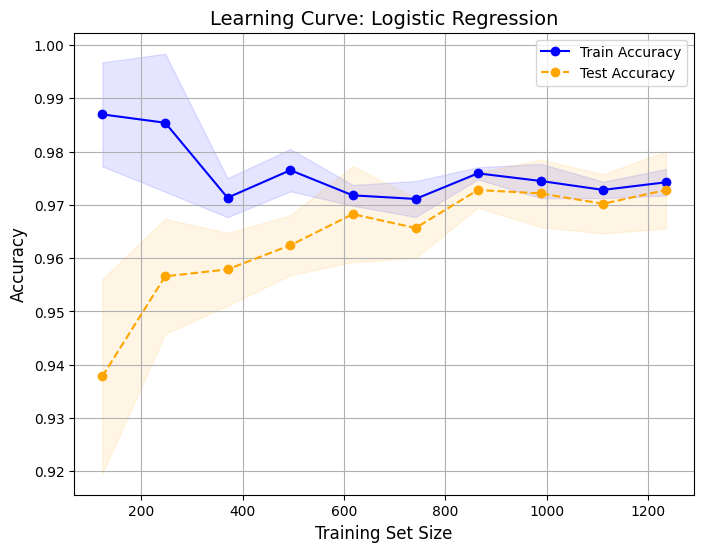

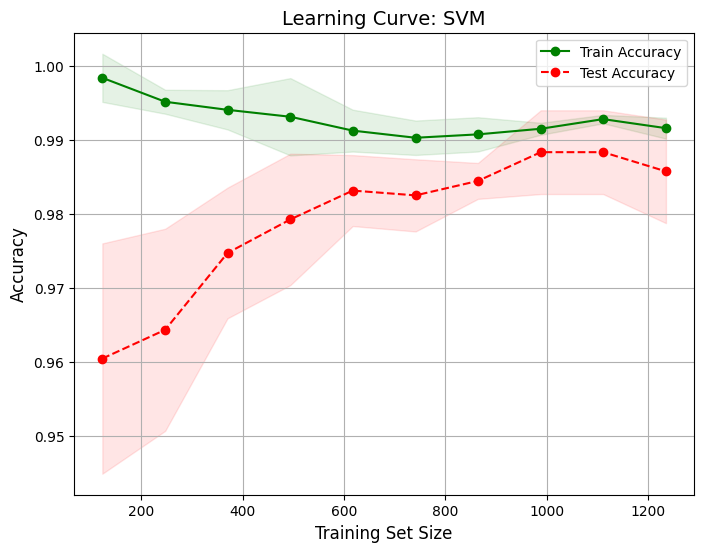

In [19]:
# Required Libraries
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Learning Curves for Logistic Regression
train_sizes_logreg, train_scores_logreg, test_scores_logreg = learning_curve(
    logreg, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Step 2: Learning Curves for SVM
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    svm, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Step 3: Plotting the learning curves

# Calculate the mean and standard deviation for training and testing scores
train_mean_logreg = train_scores_logreg.mean(axis=1)
train_std_logreg = train_scores_logreg.std(axis=1)

test_mean_logreg = test_scores_logreg.mean(axis=1)
test_std_logreg = test_scores_logreg.std(axis=1)

train_mean_svm = train_scores_svm.mean(axis=1)
train_std_svm = train_scores_svm.std(axis=1)

test_mean_svm = test_scores_svm.mean(axis=1)
test_std_svm = test_scores_svm.std(axis=1)

# Plotting Learning Curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_logreg, train_mean_logreg, color='blue', label='Train Accuracy', linestyle='-', marker='o')
plt.plot(train_sizes_logreg, test_mean_logreg, color='orange', label='Test Accuracy', linestyle='--', marker='o')
plt.fill_between(train_sizes_logreg, train_mean_logreg - train_std_logreg, train_mean_logreg + train_std_logreg, color='blue', alpha=0.1)
plt.fill_between(train_sizes_logreg, test_mean_logreg - test_std_logreg, test_mean_logreg + test_std_logreg, color='orange', alpha=0.1)

plt.title('Learning Curve: Logistic Regression', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plotting Learning Curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_svm, train_mean_svm, color='green', label='Train Accuracy', linestyle='-', marker='o')
plt.plot(train_sizes_svm, test_mean_svm, color='red', label='Test Accuracy', linestyle='--', marker='o')
plt.fill_between(train_sizes_svm, train_mean_svm - train_std_svm, train_mean_svm + train_std_svm, color='green', alpha=0.1)
plt.fill_between(train_sizes_svm, test_mean_svm - test_std_svm, test_mean_svm + test_std_svm, color='red', alpha=0.1)

plt.title('Learning Curve: SVM', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

